## The major premise of this notebook is to find a comprehensive model, treating the data as real-world. We have treated -1 values which signified null values for each feature accordingly.
### We came to this conclusion based on the fact that all the features in the dataset are positive values like Quantity, Length etc..

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

import pickle
import missingno as msno

import warnings

In [2]:
pd.set_option("display.max_columns", None)

### Loading features dataset


In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset_small.csv to dataset_small.csv


In [5]:
data = pd.read_csv("dataset_small.csv")

# Data Preprocessing


In [6]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,0.022338,-0.033814,-0.210947,1.590383,-0.298525,-0.287049,-0.293409,-0.291704,-0.296070,-0.297331,-0.293733,-0.297451,-0.296905,-0.292932,-0.298525,-0.296547,-0.219200,16.923932,-0.045750,-0.211084,-0.260466,-0.298525,-0.298525,-0.296035,-0.298082,-0.296377,-0.296956,-0.297877,-0.298082,-0.297672,-0.297366,-0.296752,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.83

### Checking null values for testing dataset

#####  We can clearly infer that there are no null values in the data frame.

In [7]:
data.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

#### Visualising the Target Feature Phishing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of Both labels ')

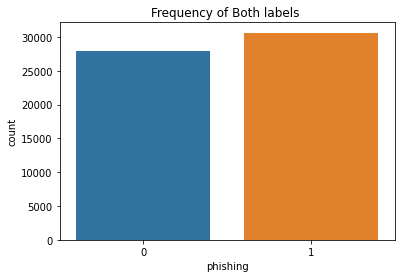

In [8]:
sns.countplot(data.phishing)
plt.title('Frequency of Both labels ')

### Checking for uniques values for each column
- we found that there are 13 such columns which have only one value through out the column.So, we try to drop those columns from the data frame.
- Here we use Variance threshold as a Feature selector that removes all low-variance features.

In [9]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data)
var_thres.get_support()
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
constant_columns

No of columns with 0 variance: 13


['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

#### We drop all the low variant features.

In [10]:
data = data.drop(constant_columns,axis=1)
data.shape


(58645, 99)

#### We delete duplicate rows (if any) 

In [11]:
print("No of duplicate columns: ",data.duplicated(keep='first').sum())
#dropping duplicate rows
data.drop_duplicates(inplace=True)

No of duplicate columns:  1240


In [12]:
# Data distribution of the features
cols1={} 
for i in data.columns:
    print("- - - - - - - - - - - - ")
    x=data[i].value_counts(normalize=True)
    print(x)
    if data[i].isin([-1]).any():
        cols1[i]=x[-1] 

- - - - - - - - - - - - 
2     0.502326
1     0.220225
3     0.178347
4     0.059385
5     0.017350
6     0.007856
7     0.003745
14    0.002334
8     0.001812
15    0.001498
9     0.001097
10    0.000836
16    0.000766
13    0.000645
12    0.000575
11    0.000557
17    0.000383
18    0.000105
20    0.000052
22    0.000052
23    0.000017
19    0.000017
24    0.000017
Name: qty_dot_url, dtype: float64
- - - - - - - - - - - - 
0     0.766484
1     0.151955
2     0.037662
3     0.015034
4     0.008745
5     0.006080
6     0.003745
7     0.002700
8     0.001916
9     0.001307
10    0.001272
11    0.000923
12    0.000645
13    0.000436
14    0.000226
15    0.000174
17    0.000139
21    0.000087
16    0.000087
18    0.000070
20    0.000052
19    0.000052
23    0.000035
25    0.000035
26    0.000035
31    0.000035
27    0.000017
35    0.000017
24    0.000017
34    0.000017
Name: qty_hyphen_url, dtype: float64
- - - - - - - - - - - - 
0     0.908196
1     0.056842
2     0.017995
3     0.008187

#### Checking which columns consists of value -1
##### Later -1 can be replaced with NAN and use KNN imputer or MissForest imputer to predict the missing value

In [13]:
data.columns[data.isin([-1]).any()]

Index(['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params

## In the cell below, we are checking the percentage of '-1' values present in each and every feature.

In [14]:
# % of data in each column as '-1'
cols1

{'asn_ip': 0.0627819876317394,
 'directory_length': 0.2877623900357112,
 'domain_google_index': 3.484017071683651e-05,
 'domain_spf': 0.19426879191708038,
 'file_length': 0.2877623900357112,
 'params_length': 0.8717359115059664,
 'qty_and_directory': 0.2877623900357112,
 'qty_and_file': 0.2877623900357112,
 'qty_and_params': 0.8717359115059664,
 'qty_asterisk_directory': 0.2877623900357112,
 'qty_asterisk_file': 0.2877623900357112,
 'qty_asterisk_params': 0.8717359115059664,
 'qty_at_directory': 0.2877623900357112,
 'qty_at_file': 0.2877623900357112,
 'qty_at_params': 0.8717359115059664,
 'qty_comma_directory': 0.2877623900357112,
 'qty_comma_file': 0.2877623900357112,
 'qty_comma_params': 0.8717359115059664,
 'qty_dollar_directory': 0.2877623900357112,
 'qty_dollar_file': 0.2877623900357112,
 'qty_dollar_params': 0.8717359115059664,
 'qty_dot_directory': 0.2877623900357112,
 'qty_dot_file': 0.2877623900357112,
 'qty_dot_params': 0.8717359115059664,
 'qty_equal_directory': 0.2877623900

In [15]:
# we can clearly infer that there are a lot of missing values in the params group.
# Here we drop the features that have maximum number of instances as Null (threshold=80%).
for i,j in cols1.items():
    if j>=0.8:
        data.drop(i,inplace=True,axis=1)

df_imp=data.replace(to_replace = -1,value =np.nan)

### Here we try to visualize the missing data in the dataframe using missing number library to plot missing values.

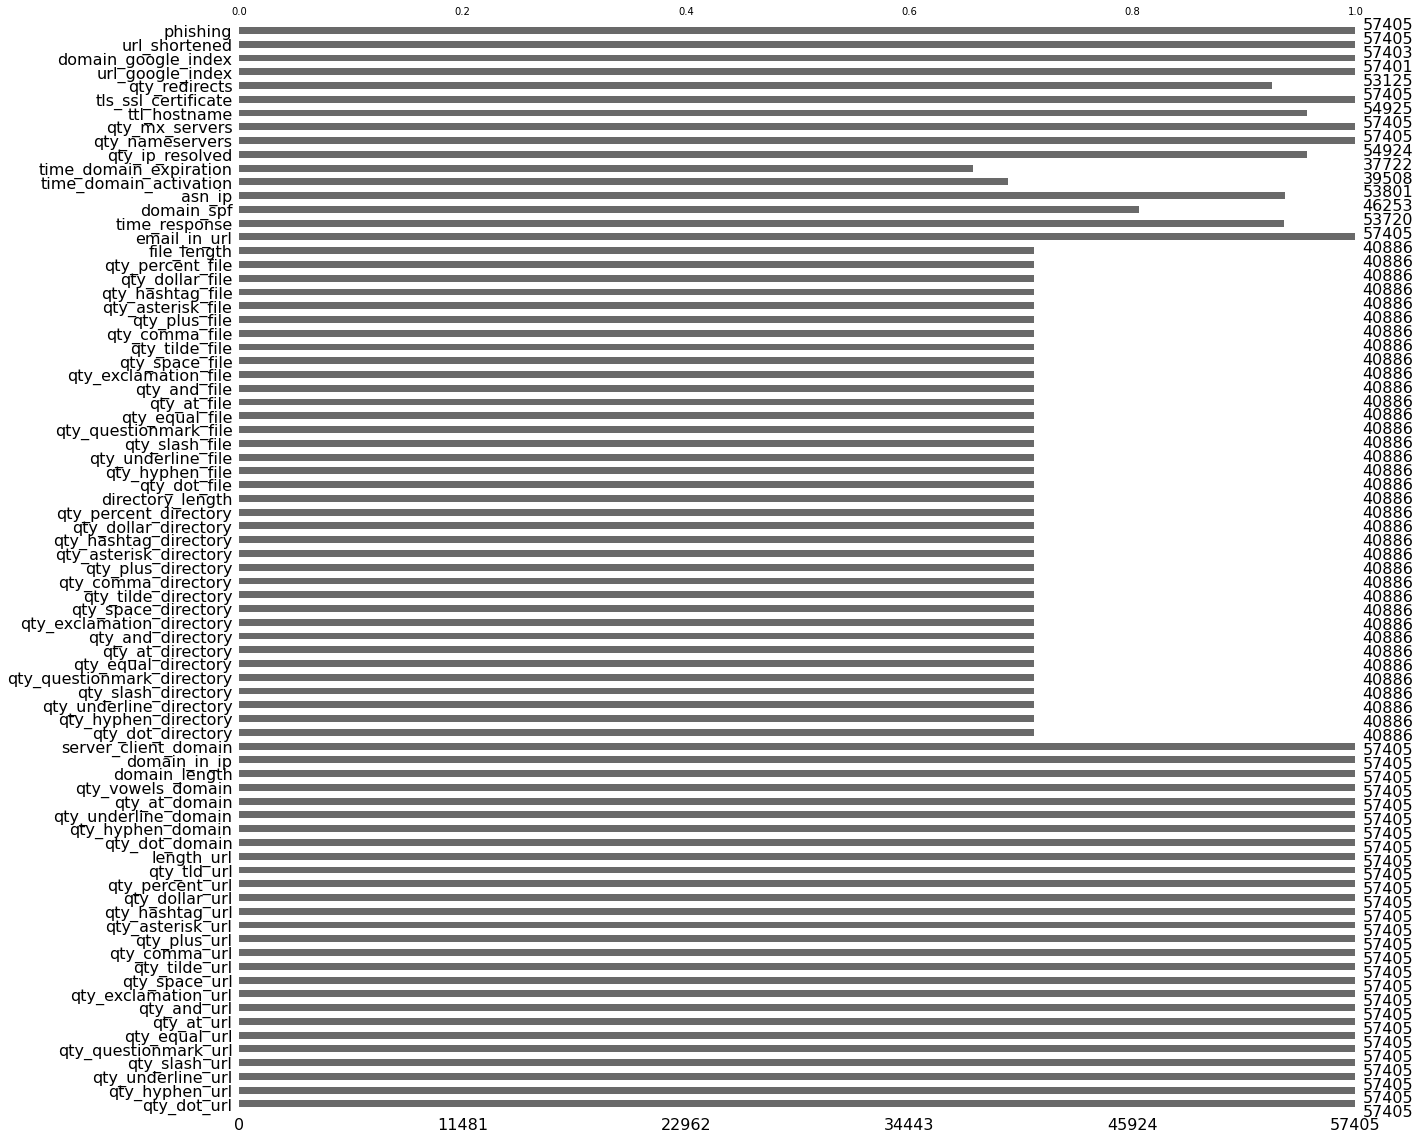

In [17]:
msno.bar(df_imp,figsize = (20,20))

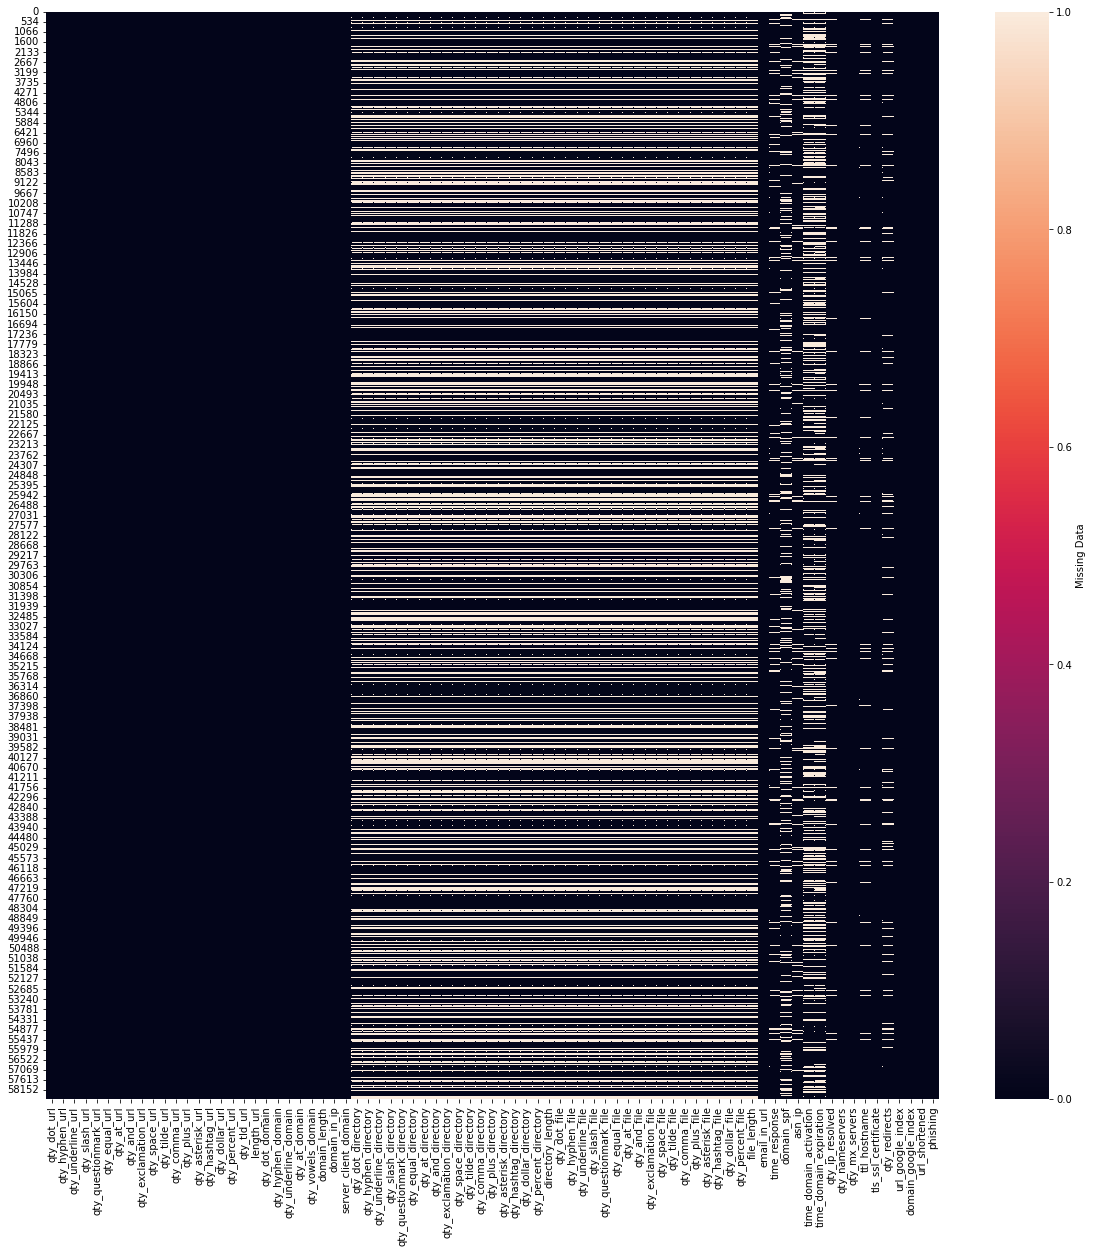

In [18]:
#missing values before imputation
plt.figure(figsize=(20,20))
sns.heatmap(df_imp.isna(),cbar_kws={'label':'Missing Data'})

## Feature Engineering
- We will impute the missing data with mutliple imputation techniques like Mean Imputation,KNN Imputer.

### Mean Imputation

In [19]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imp)
mean_imputed_df = imp_mean.transform(df_imp)
mean_imputed_df = pd.DataFrame(mean_imputed_df,columns = df_imp.columns)
mean_imputed_df.shape

(57405, 79)

### Most Frequent Imputation

In [20]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df_imp)
mostFreq_imputed_df = imp_mean.transform(df_imp)
mostFreq_imputed_df = pd.DataFrame(mostFreq_imputed_df,columns = df_imp.columns)
mostFreq_imputed_df.shape

(57405, 79)

### KNN Imputation

In [21]:
import sklearn.neighbors._base
import sys

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#usind KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=3)
knn_imputed_df=r.fit_transform(df_imp)
knn_imputed_df=pd.DataFrame(knn_imputed_df,columns=df_imp.columns)

In [22]:
knn_imputed_df.shape

(57405, 79)

In [23]:
# Below we try to check if the values in the dataframe are unique through out the column.
# If any of them exists we try to remove them.
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(knn_imputed_df)
var_thres.get_support()
constant_columns = [column for column in knn_imputed_df.columns
                    if column not in knn_imputed_df.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
print(constant_columns)

knn_imputed_df = knn_imputed_df.drop(constant_columns,axis=1)
knn_imputed_df.shape

No of columns with 0 variance: 6
['qty_questionmark_directory', 'qty_hashtag_directory', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_dollar_file']


(57405, 73)

In [24]:
# domain_spf feature values should have range:[0,1] but due to imputation, it got values such as  0.333,0.6666, as it takes an average of nearest neighbors values. 
# These values are rounded off to the nearest data instance.
print(knn_imputed_df.domain_spf.value_counts())
knn_imputed_df.domain_spf=knn_imputed_df.domain_spf.apply(lambda x:np.round(x))
print(knn_imputed_df.domain_spf.value_counts())

0.000000    47638
1.000000     9419
0.333333      307
0.666667       41
Name: domain_spf, dtype: int64
0.0    47945
1.0     9460
Name: domain_spf, dtype: int64


#### Segregating the numerical columns and categorial columns inorder to do better analysis

In [25]:
numerical_cols=[]
categorical_cols=[]
for i in knn_imputed_df.columns:
    if knn_imputed_df[i].nunique()<=2:
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
        

categorical_cols.remove('qty_at_domain')
numerical_cols.append('qty_at_domain')

print("Numerical Columns: \n",numerical_cols) 
print("###############################")
print("categorical_cols: \n",categorical_cols)

Numerical Columns: 
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', '

In [26]:
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
        'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory','qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file','qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file','qty_percent_file', 'file_length','phishing']

external_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

#### We try to count the number of observations per category for categorical features
- We can observe from below plot that the columns are relatively balanced for two features: tls_ssl_certificate_variable and target feature phishing

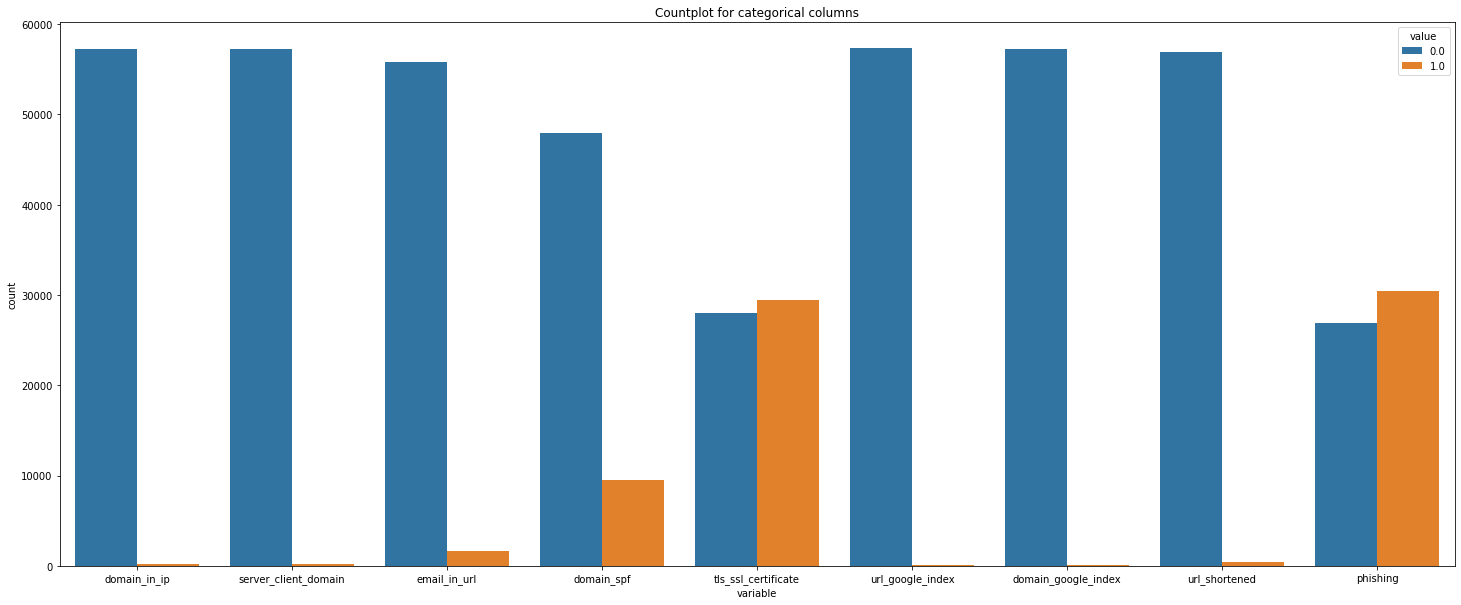

In [27]:
#countplot for categorical values
plt.figure(figsize=(25,10))
df_categorical = knn_imputed_df.loc[:,categorical_cols]
sns.countplot(x='variable',hue='value',data= pd.melt(df_categorical))
plt.title('Countplot for categorical columns')
plt.show()